In [1]:
import osmnx as ox
import networkx as nx

In [2]:
place_name = "Congrés, Badalona, Spain"
graph = ox.graph_from_place(place_name, network_type="drive")

In [3]:
ox.plot_graph_folium(graph, popup_attribute='name',
                     color='red', weight=2, opacity=0.7)

In [5]:
ox.save_graph_geopackage(graph, filepath='./network.gpkg')

In [6]:
orig = ox.distance.nearest_nodes(graph, X=-4.7943378, Y=37.8831953)

In [11]:
dest = ox.distance.nearest_nodes(graph, X=20.7870238, Y=17.8831438)

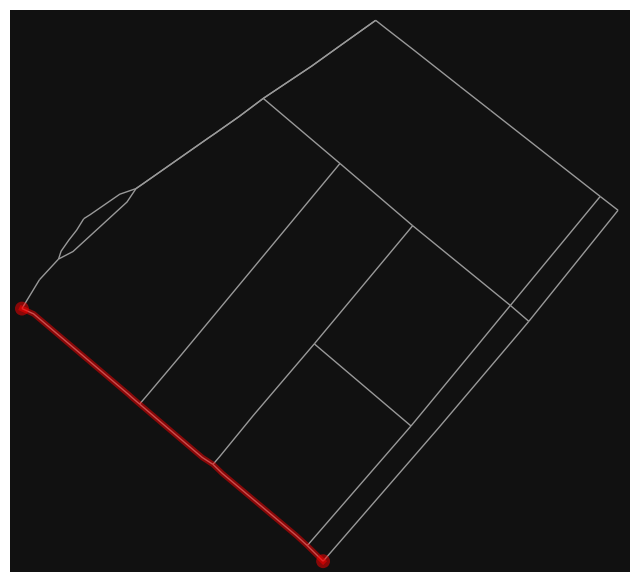

In [12]:
route = ox.shortest_path(graph, orig, dest, weight="length")
fig, ax = ox.plot_graph_route(graph, route, node_size=0)

In [14]:
ox.basic_stats(graph)

{'n': 22,
 'm': 32,
 'k_avg': 2.909090909090909,
 'edge_length_total': 2850.7069999999994,
 'edge_length_avg': 89.08459374999998,
 'streets_per_node_avg': 3.5,
 'streets_per_node_counts': {0: 0, 1: 0, 2: 0, 3: 12, 4: 9, 5: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.5454545454545454,
  4: 0.4090909090909091,
  5: 0.045454545454545456},
 'intersection_count': 22,
 'street_length_total': 2617.2709999999993,
 'street_segment_count': 29,
 'street_length_avg': 90.25072413793102,
 'circuity_avg': 1.0007386822814928,
 'self_loop_proportion': 0.0}

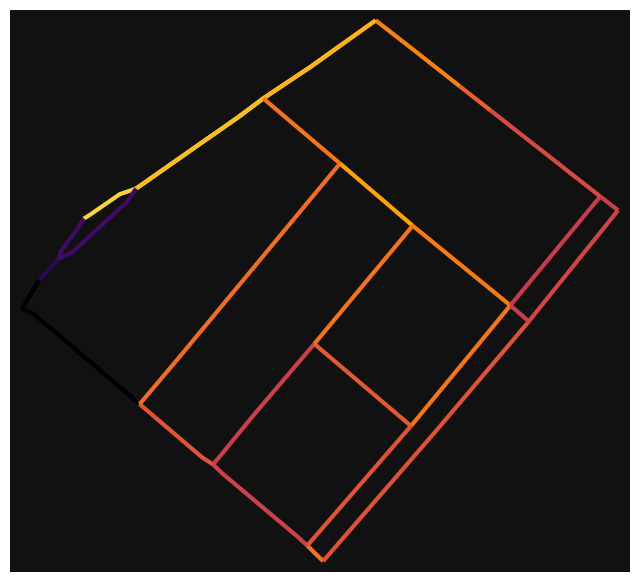

In [15]:
edge_centrality = nx.closeness_centrality(nx.line_graph(graph))
nx.set_edge_attributes(graph, edge_centrality, "edge_centrality")
ec = ox.plot.get_edge_colors_by_attr(graph, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(graph, edge_color=ec, edge_linewidth=3, node_size=0)